In [ ]:
import torch
import fastai

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

Path

In [ ]:
path = '/content/drive/MyDrive/Images'

fls = get_image_files(path)
fls

(#9323) [Path('/content/drive/MyDrive/Images/wine-red/01ca1d96d2.jpg'),Path('/content/drive/MyDrive/Images/wine-red/01fd94cbda.jpg'),Path('/content/drive/MyDrive/Images/wine-red/0154c38bb6.jpg'),Path('/content/drive/MyDrive/Images/wine-red/0257b759a5.jpg'),Path('/content/drive/MyDrive/Images/wine-red/032d1ccadc.jpg'),Path('/content/drive/MyDrive/Images/wine-red/03ad5c1eca.jpg'),Path('/content/drive/MyDrive/Images/wine-red/0464f02291.jpg'),Path('/content/drive/MyDrive/Images/wine-red/05bea5be59.jpg'),Path('/content/drive/MyDrive/Images/wine-red/078b1fd847.jpg'),Path('/content/drive/MyDrive/Images/wine-red/07a9865a2f.jpg')...]

DataBlock va DataLoader

In [ ]:
#DataBlock
foods = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=Resize(224)
)

#DataLoader
dls = foods.dataloaders(path)


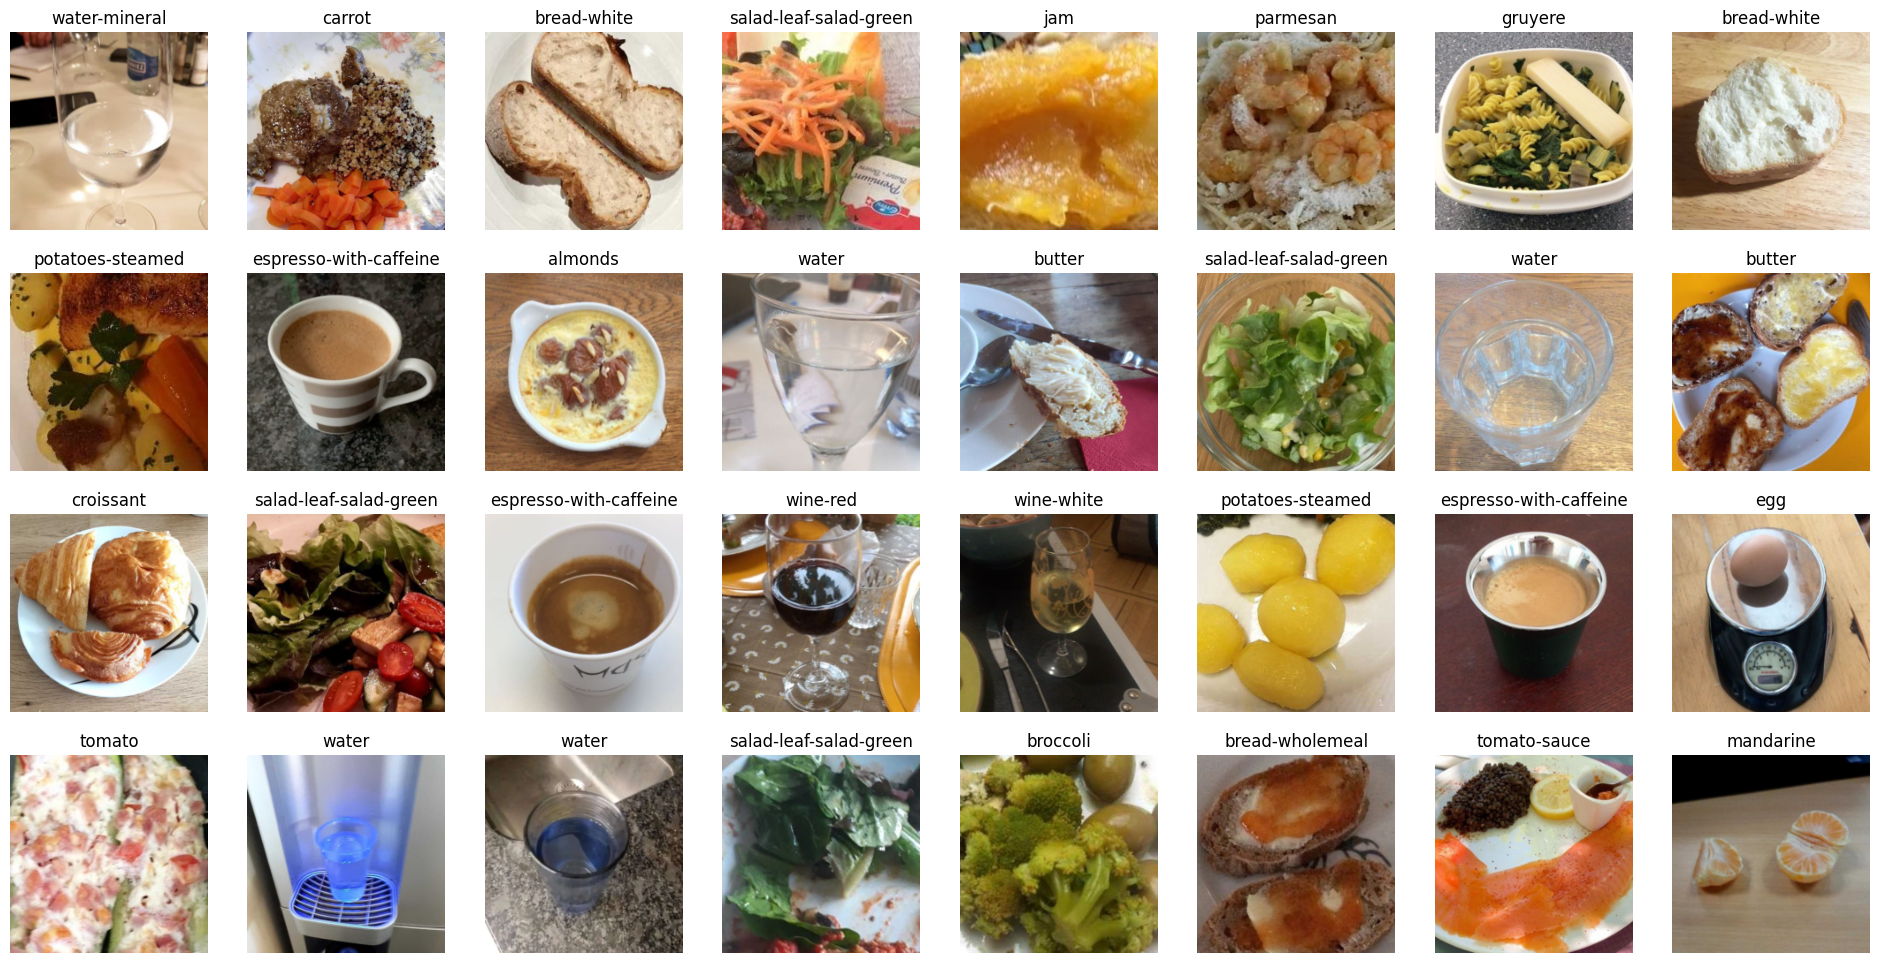

In [ ]:
dls.train.show_batch(max_n = 32, nrows = 4)

Training

In [ ]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 196MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,3.255465,2.090460,0.463519,03:38


epoch,train_loss,valid_loss,accuracy,time
0,1.997920,1.713912,0.528970,02:25
1,1.605372,1.643371,0.549893,02:29
2,1.012496,1.608655,0.557940,02:18
3,0.650715,1.611151,0.564378,02:22


<Figure size 2000x2000 with 0 Axes>

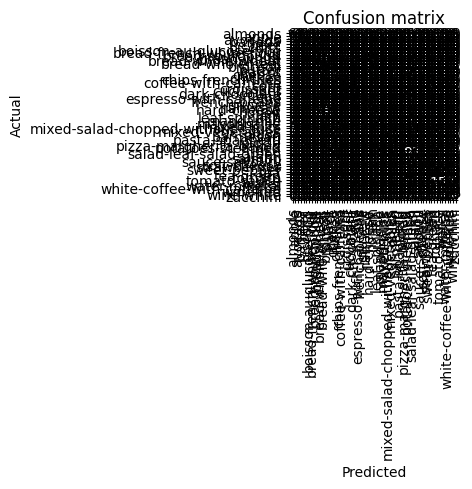

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

# Set the figure size
plt.figure(figsize=(20, 20))  # Adjust the width and height as needed

# Plot the confusion matrix
interp.plot_confusion_matrix()
plt.show()

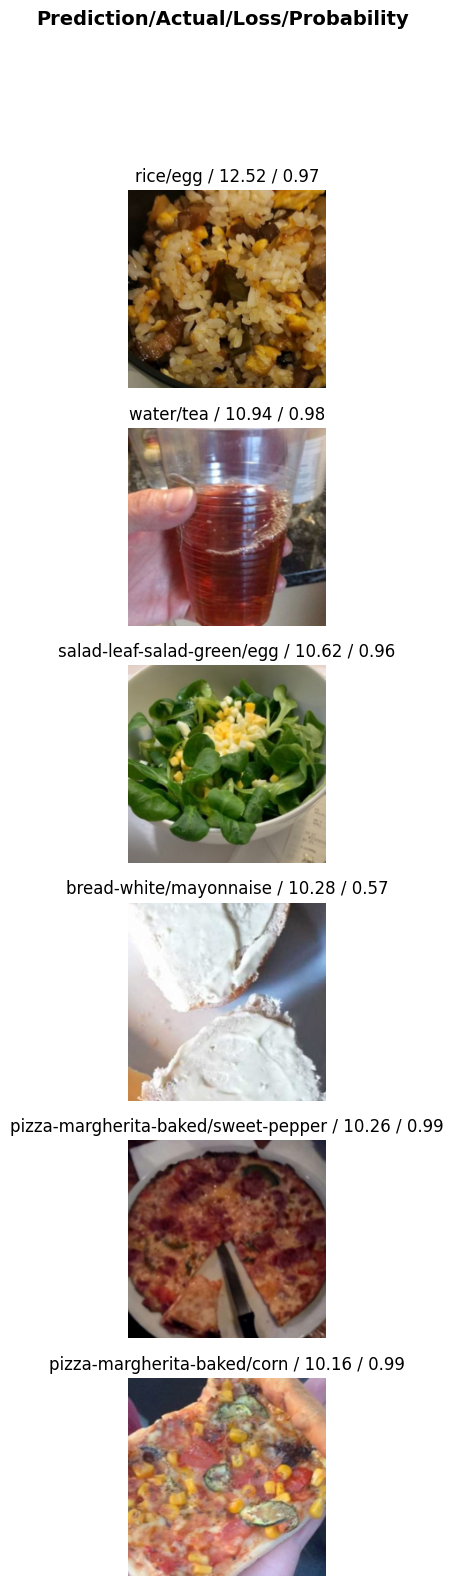

In [ ]:
interp.plot_top_losses(6, nrows=6)

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Predict: Pasta-Spaghetti
Probability:50.7%


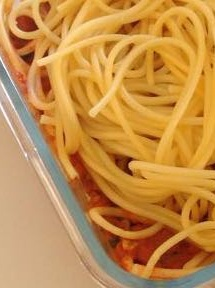

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Predict: {pred.title()}')
print(f'Probability:{probs[pred_id]*100:.1f}%')
img


In [ ]:
learn.save('ProductSegmentationModel.h5')

Path('models/ProductSegmentationModel.h5.pth')